Saving sales-of-shampoo-over-a-three-ye (1).csv to sales-of-shampoo-over-a-three-ye (1).csv


<ipython-input-1-1bbc9c03ccfa>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='2001-01-01', periods=len(df), freq='M')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


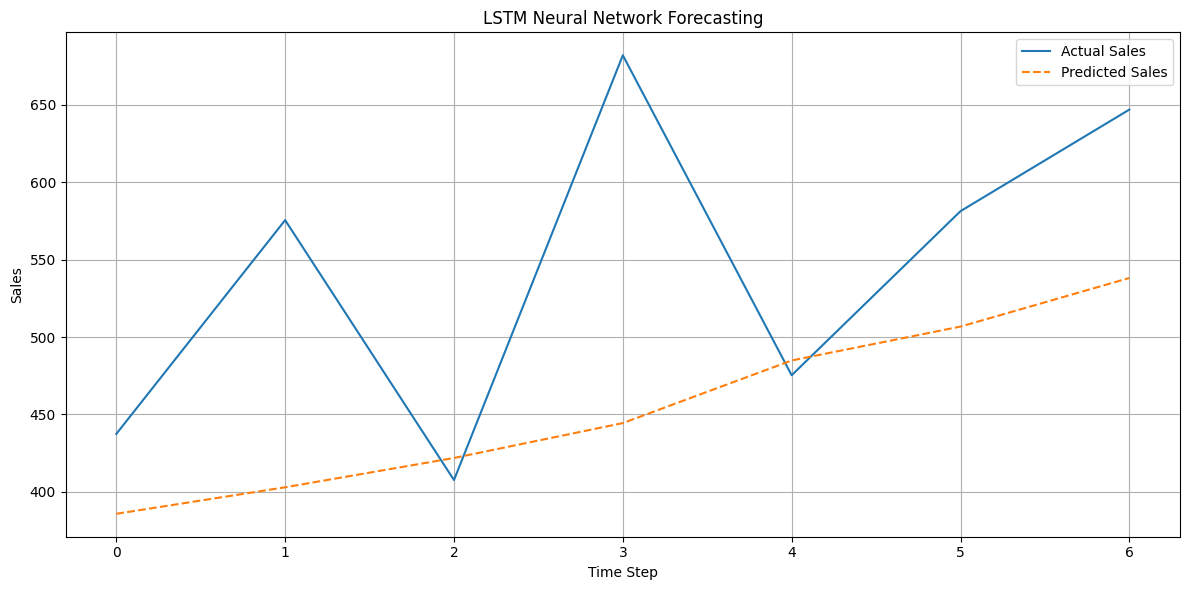

In [1]:
# Step 1: Install TensorFlow (if not pre-installed)
!pip install tensorflow

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from google.colab import files

# Step 3: Upload the dataset
uploaded = files.upload()

# Step 4: Load and preprocess the data
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.columns = ['Month', 'Sales']
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df = df.dropna()
df['Month'] = pd.date_range(start='2001-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)

# Step 5: Normalize and create sequences
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Sales']].values)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# Step 6: Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 7: Build and train LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# Step 8: Predict and inverse transform
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

# Step 9: Plot results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test_actual)), y_test_actual, label='Actual Sales')
plt.plot(np.arange(len(predicted)), predicted, label='Predicted Sales', linestyle='--')
plt.title('LSTM Neural Network Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
